In [2]:
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
rs = np.random.RandomState(10)

In [3]:
user_df=pd.read_csv('train_user.csv')
def get_date(time):
    date,hour=time.split(" ")
    return date
def get_hour(time):
    date,hour=time.split(" ")
    return hour
user_df['date'] = user_df['time'].map(get_date)
user_df['date'] = pd.to_datetime(user_df['date'])
user_df['hour'] = user_df['time'].map(get_hour)
user_df['hour'] = user_df['hour'].astype(int)
behavior_type_dummies=pd.get_dummies(user_df['behavior_type'])
behavior_type_dummies.columns=['view','favor','addcar','buy']
user_df.drop(['behavior_type','time','user_geohash'],axis=1,inplace=True)
user_df=user_df.join(behavior_type_dummies)
user_df.head()

,user_id,item_id,item_category,date,hour,view,favor,addcar,buy
0,10001082,285259775,4076,2014-12-08,18,1,0,0,0
1,10001082,4368907,5503,2014-12-12,12,1,0,0,0
2,10001082,4368907,5503,2014-12-12,12,1,0,0,0
3,10001082,53616768,9762,2014-12-02,15,1,0,0,0
4,10001082,151466952,5232,2014-12-12,11,1,0,0,0


In [16]:
item_detail=user_df[['item_id','item_category','date','view','favor','addcar','buy']][user_df.date<'2014-12-18'].groupby(['item_id','item_category','date'],as_index=False).sum()

In [17]:
item_positive=user_df[['item_id','item_category']][(user_df.date=='2014-12-18')&(user_df.buy>0)].drop_duplicates()
item_nagetive=user_df[['item_id','item_category']][(user_df.date=='2014-12-18')&(user_df.buy==0)].drop_duplicates()

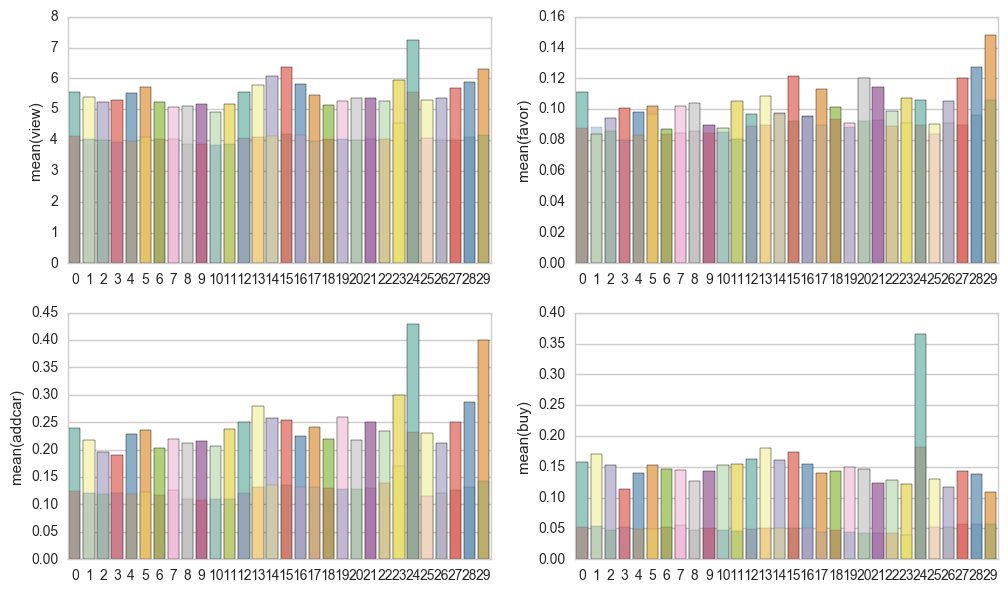

In [18]:
item_positive_everydat_total=item_positive.merge(item_detail,how='left',on=['item_id','item_category']).dropna().groupby('date',as_index=False).mean()
item_nagetive_everydat_total=item_nagetive.merge(item_detail,how='left',on=['item_id','item_category']).dropna().groupby('date',as_index=False).mean()
f,axes=plt.subplots(2,2,figsize=(12,7))
sns.barplot(item_positive_everydat_total.index, item_positive_everydat_total.view,palette="Set3",ax=axes[0,0])
sns.barplot(item_nagetive_everydat_total.index, item_nagetive_everydat_total.view,palette="Set1",alpha=.3,ax=axes[0,0])
sns.barplot(item_positive_everydat_total.index, item_positive_everydat_total.favor,palette="Set3",ax=axes[0,1])
sns.barplot(item_nagetive_everydat_total.index, item_nagetive_everydat_total.favor,palette="Set1",alpha=.3,ax=axes[0,1])
sns.barplot(item_positive_everydat_total.index, item_positive_everydat_total.addcar,palette="Set3",ax=axes[1,0])
sns.barplot(item_nagetive_everydat_total.index, item_nagetive_everydat_total.addcar,palette="Set1",alpha=.3,ax=axes[1,0])
sns.barplot(item_positive_everydat_total.index, item_positive_everydat_total.buy,palette="Set3",ax=axes[1,1])
sns.barplot(item_nagetive_everydat_total.index, item_nagetive_everydat_total.buy,palette="Set1",alpha=.3,ax=axes[1,1])

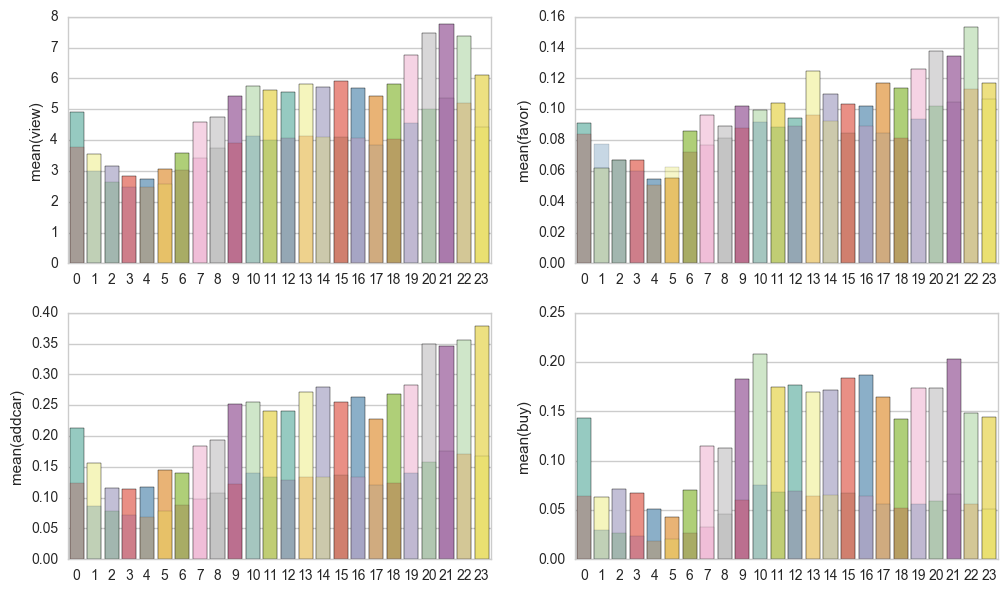

In [20]:
item_detail_hour=user_df[['item_id','item_category','hour','view','favor','addcar','buy']][user_df.date<'2014-12-18'].groupby(['item_id','item_category','hour'],as_index=False).sum()
item_positive_everyhour_total=item_positive.merge(item_detail_hour,how='left',on=['item_id','item_category']).dropna().groupby('hour',as_index=False).mean()
item_nagetive_everyhour_total=item_nagetive.merge(item_detail_hour,how='left',on=['item_id','item_category']).dropna().groupby('hour',as_index=False).mean()
f,axes=plt.subplots(2,2,figsize=(12,7))
sns.barplot(item_positive_everyhour_total.index, item_positive_everyhour_total.view,palette="Set3",ax=axes[0,0])
sns.barplot(item_nagetive_everyhour_total.index, item_nagetive_everyhour_total.view,palette="Set1",alpha=.3,ax=axes[0,0])
sns.barplot(item_positive_everyhour_total.index, item_positive_everyhour_total.favor,palette="Set3",ax=axes[0,1])
sns.barplot(item_nagetive_everyhour_total.index, item_nagetive_everyhour_total.favor,palette="Set1",alpha=.3,ax=axes[0,1])
sns.barplot(item_positive_everyhour_total.index, item_positive_everyhour_total.addcar,palette="Set3",ax=axes[1,0])
sns.barplot(item_nagetive_everyhour_total.index, item_nagetive_everyhour_total.addcar,palette="Set1",alpha=.3,ax=axes[1,0])
sns.barplot(item_positive_everyhour_total.index, item_positive_everyhour_total.buy,palette="Set3",ax=axes[1,1])
sns.barplot(item_nagetive_everyhour_total.index, item_nagetive_everyhour_total.buy,palette="Set1",alpha=.3,ax=axes[1,1])